In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Indian_Food_Nutrition_Processed.csv")  
df.head()


,Dish Name,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Folate (µg)
0,Hot tea (Garam Chai),16.14,2.58,0.39,0.53,2.58,0.00,3.12,14.20,0.02,0.50,1.80
1,Instant coffee,23.16,3.65,0.64,0.75,3.62,0.00,4.92,20.87,0.06,1.51,5.60
2,Espreso coffee,51.54,6.62,1.75,2.14,6.53,0.00,13.98,58.10,0.15,1.51,5.53
3,Iced tea,10.34,2.70,0.03,0.01,2.70,0.00,0.23,1.18,0.02,5.95,1.28
4,Raw mango drink (Aam panna),35.92,9.05,0.16,0.03,7.49,0.61,79.82,7.08,0.14,45.30,14.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dish Name          1014 non-null   object 
 1   Calories (kcal)    1014 non-null   float64
 2   Carbohydrates (g)  1014 non-null   float64
 3   Protein (g)        1014 non-null   float64
 4   Fats (g)           1014 non-null   float64
 5   Free Sugar (g)     1014 non-null   float64
 6   Fibre (g)          1014 non-null   float64
 7   Sodium (mg)        1014 non-null   float64
 8   Calcium (mg)       1014 non-null   float64
 9   Iron (mg)          1014 non-null   float64
 10  Vitamin C (mg)     932 non-null    float64
 11  Folate (µg)        932 non-null    float64
dtypes: float64(11), object(1)
memory usage: 95.2+ KB


In [5]:
df.describe()

,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Folate (µg)
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,932.000000,932.000000
mean,233.735897,18.354004,4.753008,16.267584,8.824832,1.962485,481.076755,59.877091,1.136953,14.985172,41.920000
std,187.599467,16.745936,3.442746,20.452322,12.378324,2.771622,1750.646423,67.441463,1.520863,26.619886,54.147515
min,6.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.180000,5.582500,2.100000,4.030000,1.152500,0.590000,41.910000,18.237500,0.460000,1.257500,11.955000
50%,174.920000,11.925000,3.990000,9.095000,2.780000,1.325000,101.290000,40.680000,0.830000,5.400000,24.770000
75%,315.845000,26.870000,6.602500,17.085000,11.822500,2.347500,196.605000,79.385000,1.290000,18.222500,49.100000
max,839.330000,86.530000,21.550000,90.450000,85.570000,35.710000,14174.590000,631.820000,20.570000,382.640000,550.520000


In [6]:
(df.isnull().sum()/len(df))*100 
## 8% null values that is 82 values are missing.

Dish Name            0.000000
Calories (kcal)      0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
Fats (g)             0.000000
Free Sugar (g)       0.000000
Fibre (g)            0.000000
Sodium (mg)          0.000000
Calcium (mg)         0.000000
Iron (mg)            0.000000
Vitamin C (mg)       8.086785
Folate (µg)          8.086785
dtype: float64

In [7]:
# filling the null values with median because these columns has outliers.
df['Vitamin C (mg)'] = df['Vitamin C (mg)'].fillna(df['Vitamin C (mg)'].median())
df['Folate (µg)'] = df['Folate (µg)'].fillna(df['Folate (µg)'].median())


In [8]:
df.duplicated().sum()
## No duplicate values.

0

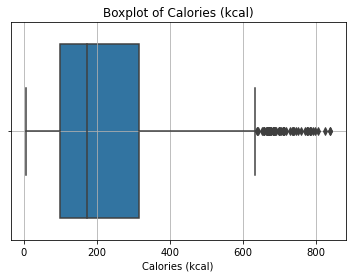

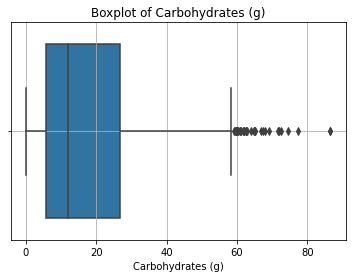

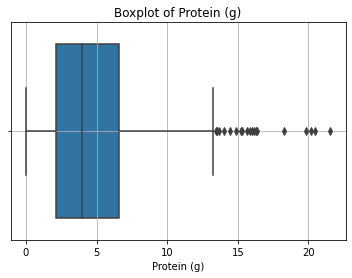

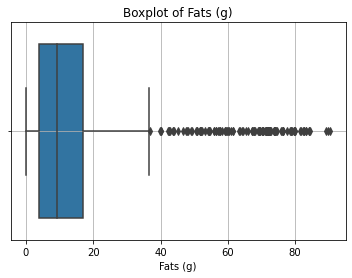

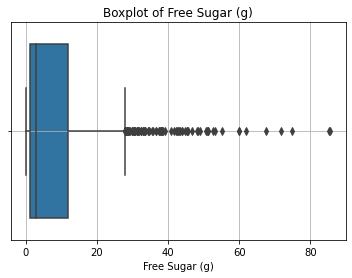

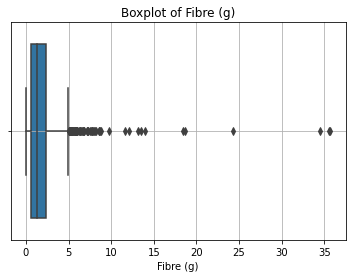

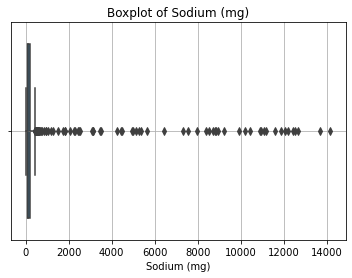

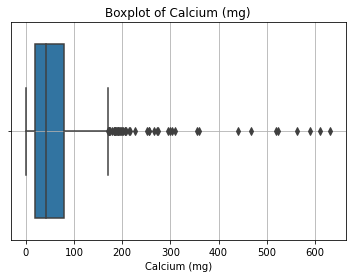

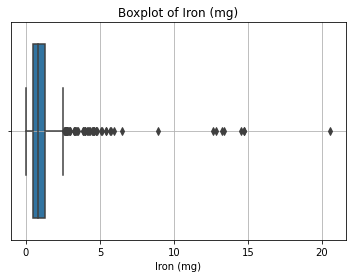

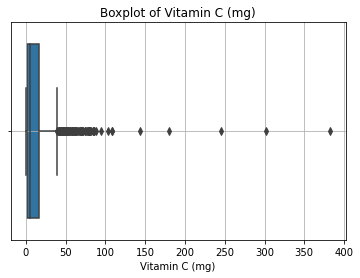

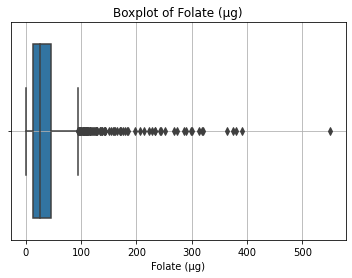

In [9]:
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.show()

In [10]:
nutrient_cols = [
    'Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)', 'Fats (g)',
    'Free Sugar (g)', 'Fibre (g)', 'Sodium (mg)', 'Calcium (mg)',
    'Iron (mg)', 'Vitamin C (mg)', 'Folate (µg)'
]
X = df[nutrient_cols]


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


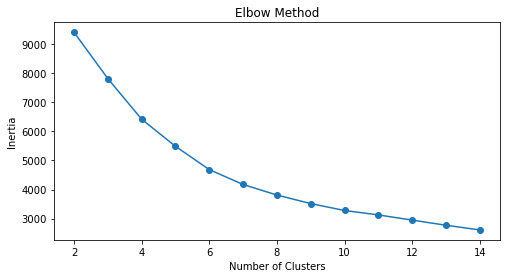

In [12]:
inertia = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [13]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"K={k} → Silhouette Score = {sil:.4f}")


K=2 → Silhouette Score = 0.2972
K=3 → Silhouette Score = 0.3178
K=4 → Silhouette Score = 0.3201
K=5 → Silhouette Score = 0.3477
K=6 → Silhouette Score = 0.3477
K=7 → Silhouette Score = 0.2876
K=8 → Silhouette Score = 0.2931
K=9 → Silhouette Score = 0.2820


** Best clusters are K = 5 or K = 6

Both have the highest silhouette score = 0.3477.

In [14]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])   


In [15]:
kmeans = KMeans(n_clusters=6, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]


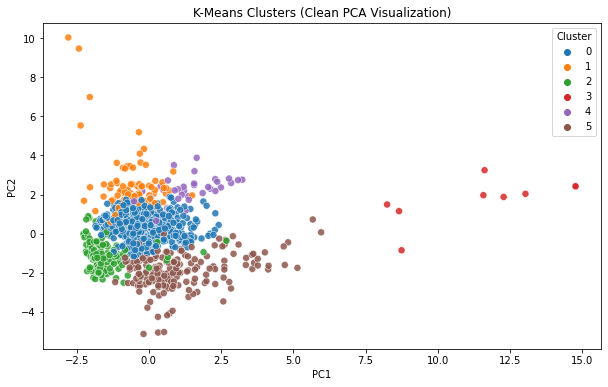

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10", s=50, alpha=0.85
)
plt.title("K-Means Clusters (Clean PCA Visualization)")
plt.show()


<Figure size 1008x432 with 0 Axes>

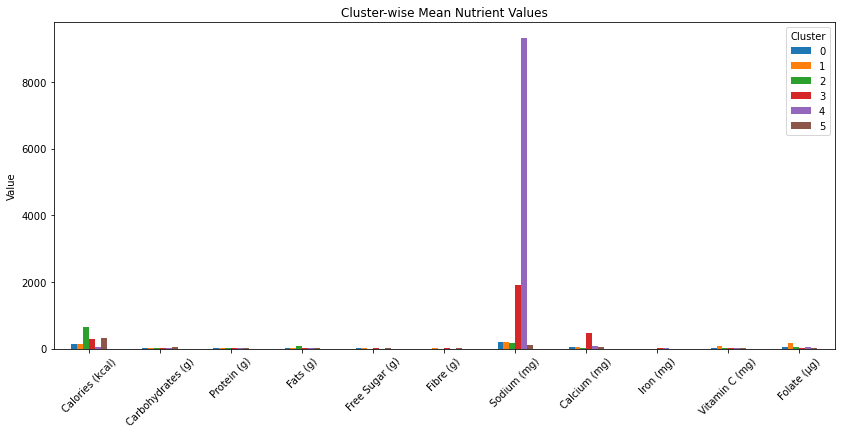

In [18]:
plt.figure(figsize=(14,6))
df.groupby("Cluster")[nutrient_cols].mean().T.plot(kind='bar', figsize=(14,6))
plt.title("Cluster-wise Mean Nutrient Values")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


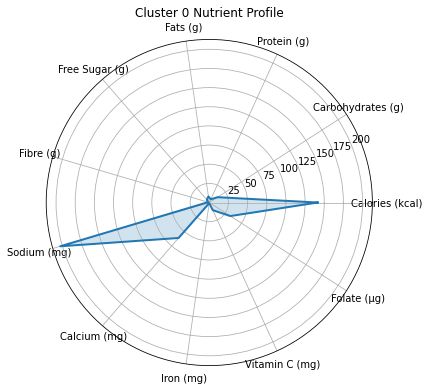

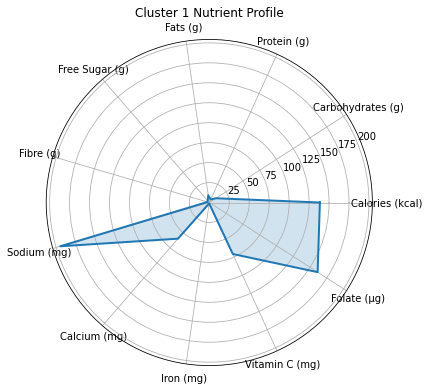

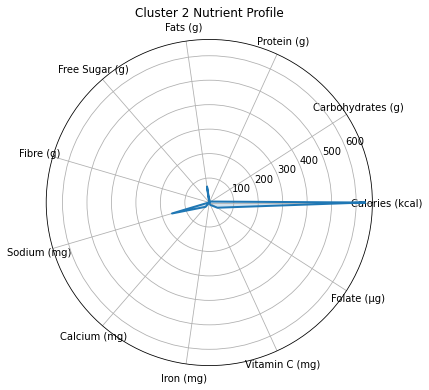

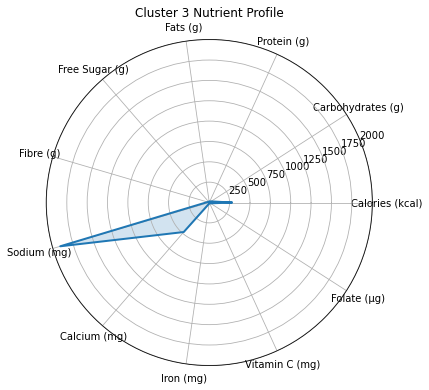

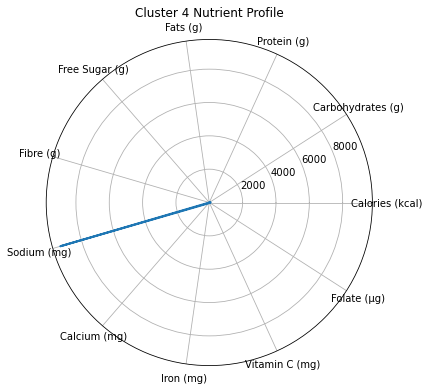

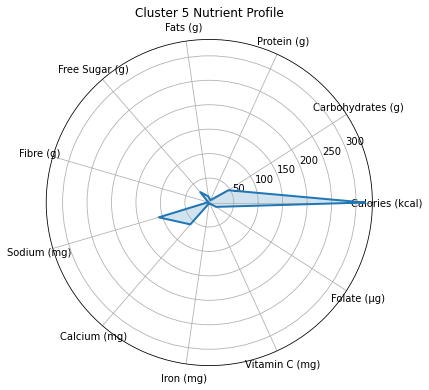

In [19]:
from math import pi

cluster_means = df.groupby("Cluster")[nutrient_cols].mean()

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values.tolist()
    values += values[:1]
    
    angles = [n / float(len(nutrient_cols)) * 2 * pi for n in range(len(nutrient_cols))]
    angles += angles[:1]
    
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], nutrient_cols)
    
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.2)
    plt.title(f"Cluster {cluster} Nutrient Profile")
    plt.show()


In [20]:
for c in df["Cluster"].unique():
    print(f"\nCluster {c} sample dishes:")
    print(df[df["Cluster"] == c]["Dish Name"].head(10).tolist())



Cluster 0 sample dishes:
['Hot tea (Garam Chai)', 'Instant coffee', 'Espreso coffee', 'Iced tea', 'Raw mango drink (Aam panna)', 'Fruit Punch (with fresh juices)', 'Fruit Punch (with squashes)', 'Lemonade', 'Lem-o-gin', 'Cumin infused water (Jeere/Zeere ka pani)']

Cluster 1 sample dishes:
['Summer cooler', 'Cream of spinach soup', 'Green chickpeas pulao (Choliya pulao/Hare chane ka pulao)', 'Chinese fried rice', 'Vegetable chowmein', 'Chicken chowmein', 'Pasta hot pot', 'Fettuccine with spinach sauce', 'Chickpeas curry (Safed channa curry)', 'Khatta channa']

Cluster 5 sample dishes:
['Sweet open sandwich', 'Khoa and coconut pancake', 'Sweet rice (Meethe chawal)', 'Tamarind rice (Chintapandu pulihora/Puliyodharai/Puli sadam/Huli anna)', 'Naan', 'Saunth/Sonth chutney with tamarind/imli', 'Shahi suji halwa', 'Egg halwa (Ande ka halwa)', 'Pumpkin halwa (Kaddu ka halwa)', 'Moong dal halwa']

Cluster 2 sample dishes:
['Sesame toast', 'Chinese cabbage and meat ball soup', 'Poori', 'Spinach

STEP 7 — 2D Visualization (Clean)

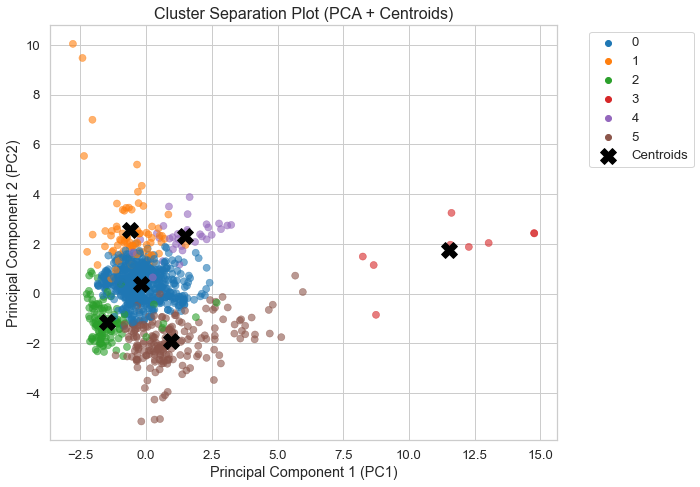

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df already contains PC1, PC2, and Cluster columns
plt.figure(figsize=(10, 7))

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# Scatter plot with transparency
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="tab10",
    s=50,
    alpha=0.6,
    edgecolor=None,
    legend="full"
)

# ---- Plot Centroids ----
centroids = df.groupby("Cluster")[["PC1", "PC2"]].mean()

plt.scatter(
    centroids["PC1"],
    centroids["PC2"],
    marker='X',
    s=250,
    c='black',
    label='Centroids'
)

# Labels & title
plt.title("Cluster Separation Plot (PCA + Centroids)", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")

# Legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


| Cluster | Category Name                         | Characteristics                                                    | Example Dishes                                      |
| ------- | ------------------------------------- | ------------------------------------------------------------------ | --------------------------------------------------- |
| **0**   | **Sandwiches & Light Snacks**         | Moderate calories, moderate carbs, balanced nutrients, bread-based | Club sandwich, Egg sandwich, Cheese sandwiches      |
| **1**   | **Fried / Heavy Main-course Items**   | High fat, deep-fried, high calories                                | Poori, Bhatura, Paneer pulao                        |
| **2**   | **Soups (Light & Protein-rich)**      | Low calorie, high water content, often protein rich                | Lentil soup, Minestrone, Chicken sweet corn soup    |
| **3**   | **Beverages & Drinks**                | Very low calorie, mostly liquid, minimal fats/protein              | Tea, Coffee, Aam panna, Lemonade                    |
| **4**   | **Masalas, Chutneys & Condiments**    | Very low calories, high sodium/spices, powdered items              | Pav bhaji masala, Sambar powder, Gun powder chutney |
| **5**   | **Sweet & High-Carb Desserts / Rice** | High carb, sweet, rich foods                                       | Halwa, Sweet rice, Tamarind rice, Naan              |


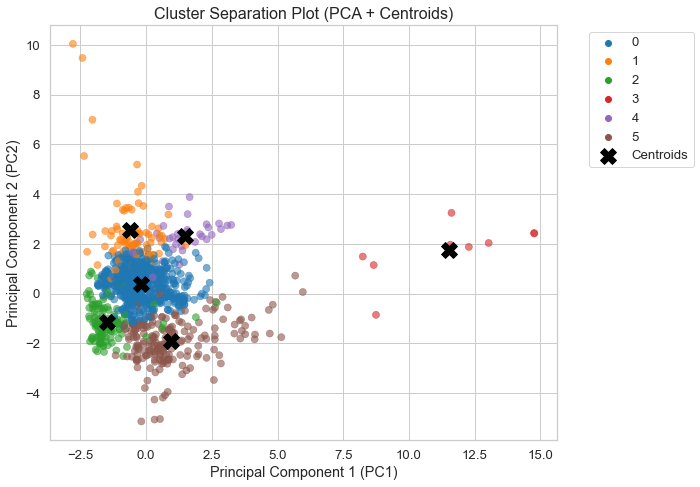

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df already contains PC1, PC2, and Cluster columns
plt.figure(figsize=(10, 7))

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# Scatter plot with transparency
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="tab10",
    s=50,
    alpha=0.6,
    edgecolor=None,
    legend="full"
)

# ---- Plot Centroids ----
centroids = df.groupby("Cluster")[["PC1", "PC2"]].mean()

plt.scatter(
    centroids["PC1"],
    centroids["PC2"],
    marker='X',
    s=250,
    c='black',
    label='Centroids'
)

# Labels & title
plt.title("Cluster Separation Plot (PCA + Centroids)", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")

# Legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


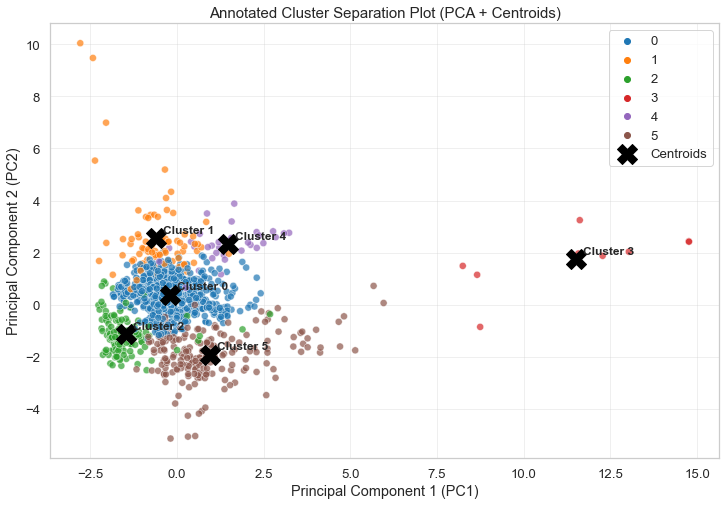

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df already contains: PC1, PC2, Cluster
# Example: df[['PC1','PC2','Cluster']]

# Compute centroids on PCA space
centroids = df.groupby("Cluster")[["PC1", "PC2"]].mean()

plt.figure(figsize=(12, 8))

# Scatter Plot of Clusters
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    s=50,
    alpha=0.7
)

# Plot Centroids
plt.scatter(
    centroids["PC1"],
    centroids["PC2"],
    s=400, c="black", marker="X", label="Centroids"
)

#  Add Annotation Labels for Centroids
for cluster_id, row in centroids.iterrows():
    plt.text(
        row["PC1"] + 0.2,     # Horizontal offset
        row["PC2"] + 0.2,     # Vertical offset
        f"Cluster {cluster_id}",
        fontsize=12,
        weight='bold'
    )

plt.title("Annotated Cluster Separation Plot (PCA + Centroids)", fontsize=15)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


A small amount of overlap between clusters is completely normal. Many dishes share similar nutritional profiles, so their PCA coordinates naturally fall close together.
Since PCA compresses 12 nutrient features into just 2 components, some information is lost, and this can make clusters appear slightly mixed visually even when they are well separated in the full feature space.

Importantly, the cluster centroids remain clearly distinct, showing that the K-Means model has successfully captured meaningful nutritional differences between the groups.
Therefore, the minor overlap does not indicate a problem — it simply reflects natural similarities in food nutrition and the limitation of visualizing high-dimensional data in 2D.

Cluster 0 – Sandwiches

Moderate calories

Moderate fat

Medium protein

Bread + filling pattern

Examples: club sandwich, cheese tomato sandwich

Cluster 1 – Fried/Breaded Foods + Puri Variants

High carbs

High fat

High sodium

Examples: poori, methi poori, bhatura, sesame toast

Cluster 2 – Soups

Low calories

Low fat

Moderate to high protein

High water content

Examples: minestrone, chicken sweet corn soup, consommé

Cluster 3 – Beverages / Drinks

Very low calories

Very low fat

Mostly liquids

Examples: iced tea, lemonade, fruit punch, aam panna

Cluster 4 – Masalas / Spice Mixes

Very high sodium

High mineral content

Very low calories

Examples: garam masala, sambar powder, rasam powder

Cluster 5 – Sweets / Rice-Desserts

High carbs

High sugar

High energy density

Examples: halwa, sweet rice, tamarind rice, naan

In [24]:
def recommend_food(dish_name, df):
    if dish_name not in df['Dish Name'].values:
        return "Dish not found!"

    cluster = df[df['Dish Name'] == dish_name]['Cluster'].values[0]
    similar_foods = df[df['Cluster'] == cluster]['Dish Name']

    return similar_foods.head(10).tolist()


In [25]:
recommend_food("Instant coffee", df)


['Hot tea (Garam Chai)',
 'Instant coffee',
 'Espreso coffee',
 'Iced tea',
 'Raw mango drink (Aam panna)',
 'Fruit Punch (with fresh juices)',
 'Fruit Punch (with squashes)',
 'Lemonade',
 'Lem-o-gin',
 'Cumin infused water (Jeere/Zeere ka pani)']

In [26]:
recommend_food("Tomato chutney (Tamatar ki chutney)", df)

['Sweet open sandwich',
 'Khoa and coconut pancake',
 'Sweet rice (Meethe chawal)',
 'Tamarind rice (Chintapandu pulihora/Puliyodharai/Puli sadam/Huli anna)',
 'Naan',
 'Saunth/Sonth chutney with tamarind/imli',
 'Shahi suji halwa',
 'Egg halwa (Ande ka halwa)',
 'Pumpkin halwa (Kaddu ka halwa)',
 'Moong dal halwa']

In [27]:
recommend_food("Chat masala", df)

['Sesame ladoo (Til ke ladoo)',
 'Lotus stem pickle (Kamal kakdi ka achar)',
 'Pav bhaji masala',
 'Garam masala',
 'Chat masala',
 'Kashmiri masala',
 'Rasam powder (Rasam masala)',
 'Sambar powder (Sambar masala)',
 'Bengal 5 Spice Blend (Panch Phoran)']

In [28]:
recommend_food("Pumpkin halwa (Kaddu ka halwa)", df)

['Sweet open sandwich',
 'Khoa and coconut pancake',
 'Sweet rice (Meethe chawal)',
 'Tamarind rice (Chintapandu pulihora/Puliyodharai/Puli sadam/Huli anna)',
 'Naan',
 'Saunth/Sonth chutney with tamarind/imli',
 'Shahi suji halwa',
 'Egg halwa (Ande ka halwa)',
 'Pumpkin halwa (Kaddu ka halwa)',
 'Moong dal halwa']

In [29]:
df.isnull().sum()

Dish Name            0
Calories (kcal)      0
Carbohydrates (g)    0
Protein (g)          0
Fats (g)             0
Free Sugar (g)       0
Fibre (g)            0
Sodium (mg)          0
Calcium (mg)         0
Iron (mg)            0
Vitamin C (mg)       0
Folate (µg)          0
Cluster              0
PC1                  0
PC2                  0
dtype: int64

In [30]:
df.isnull().sum()

Dish Name            0
Calories (kcal)      0
Carbohydrates (g)    0
Protein (g)          0
Fats (g)             0
Free Sugar (g)       0
Fibre (g)            0
Sodium (mg)          0
Calcium (mg)         0
Iron (mg)            0
Vitamin C (mg)       0
Folate (µg)          0
Cluster              0
PC1                  0
PC2                  0
dtype: int64

In [31]:
# ==========================================
#   RECOMMENDATION SYSTEM MODEL (FINAL CODE)
#   
# ==========================================

import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------
# 1. Select features from your existing df
# ------------------------------------------
feature_cols = [
    'Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)', 'Fats (g)',
    'Free Sugar (g)', 'Fibre (g)', 'Sodium (mg)', 'Calcium (mg)',
    'Iron (mg)', 'Vitamin C (mg)', 'Folate (µg)'
]

X = df[feature_cols]    

# ------------------------------------------
# 2. Scale the nutritional features
# ------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
# 3. Build cosine similarity matrix
# ------------------------------------------
similarity_matrix = cosine_similarity(X_scaled)

# ------------------------------------------
# 4. Recommendation function
# ------------------------------------------
def recommend_dishes(dish_name, df, similarity_matrix, top_n=10):
    if dish_name not in df['Dish Name'].values:
        return ["Dish not found in dataset"]

    idx = df[df['Dish Name'] == dish_name].index[0]

    scores = list(enumerate(similarity_matrix[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    top_matches = sorted_scores[1:top_n+1]
    
    return [df.iloc[i]['Dish Name'] for i, score in top_matches]

# ------------------------------------------
# 5. Save Model Artifacts
# ------------------------------------------
joblib.dump(scaler, "scaler.pkl")
joblib.dump(similarity_matrix, "similarity.pkl")
joblib.dump(df, "df.pkl")

print("Model built & saved successfully!")


Model built & saved successfully!
